
### 타이타닉 데이타 셋


  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.

In [1]:
import pandas as pd

titanic = pd.read_csv('data/titanic.csv')

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# (1) 1등실 승객중 나이가 10세 미만인 승객
data1 = titanic[(titanic['Pclass']==1) & (titanic['Age']<10)]
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


In [11]:
# (2) 선실 등급별 승객의 수
titanic[['Pclass','PassengerId']].groupby('Pclass').count()


,PassengerId
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass,Survived'>

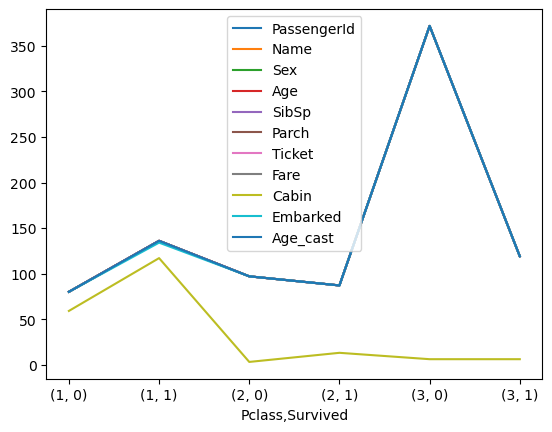

In [13]:
# (3) 선실 등급별 생존자 수
# titanic[['Pclass','Survived','PassengerId']].groupby(['Pclass','Survived']).count()
temp = titanic.groupby(['Pclass', 'Survived']).count()
temp.plot()

In [6]:
"""
    groupby().agg()

    DataFrame의 groupby()는 SQL의 group by 보다 유연성이 떨어질 수 밖에 없다
    그래도 DataFrame의 groupby()에서 여러 개의 컬럼에 각각 다른 집계 함수를 사용할 때 agg() 함수 이용
"""

#  선실등급별 가장 많은 나이값, 평균요금 구하고자 한다면??
titanic.groupby('Pclass').agg({'Age':'max', 'Fare':'mean'})



,Age,Fare
Pclass,,
1,80.0,84.154687
2,70.0,20.662183
3,74.0,13.675550


In [7]:
# 나이에 따라 15미만은 Chlid, 15이상 60세 미만은 'Adult' 그 이상은 Elderly로 구분하려면

def get_age_cate(age):
    if age < 15: cat = 'Child'
    elif age < 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

titanic['Age_cast'] = titanic['Age'].apply(get_age_cate)
titanic.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cast
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [8]:
#선실 등급별 나이등급에 따른 생존자수 확인 

titanic[['Pclass','Age_cast','Survived']].groupby(['Pclass','Age_cast']).sum()

Survived
Pclass Age_cast          
1      Adult          127
       Child            4
       Elderly          5
2      Adult           67
       Child           19
       Elderly          1
3      Adult           96
       Child           22
       Elderly          1